In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("wine.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [4]:
df.drop(df[df['quality'] == 9].index, inplace = True)
df.drop(df[df['quality'] == 3].index, inplace = True)
df.drop(df[df['quality'] == 4].index, inplace = True)
df.drop(df[df['quality'] == 8].index, inplace = True)

In [5]:
df['quality'].value_counts()

6    2198
5    1457
7     880
Name: quality, dtype: int64

<AxesSubplot:xlabel='fixed acidity', ylabel='free sulfur dioxide'>

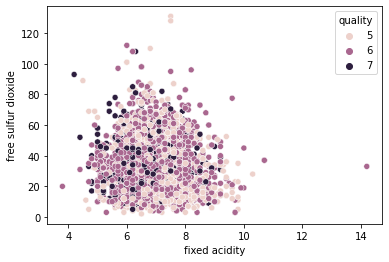

In [6]:
sns.scatterplot(x="fixed acidity",y='free sulfur dioxide',hue='quality',data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='pH'>

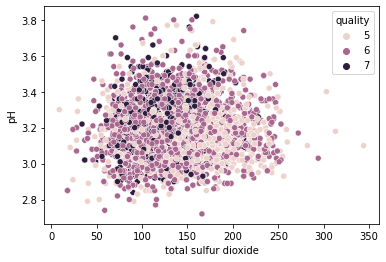

In [7]:
sns.scatterplot(x="total sulfur dioxide",y='pH',hue='quality',data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

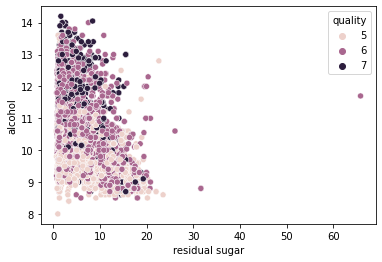

In [8]:
sns.scatterplot(x="residual sugar",y='alcohol',hue='quality',data=df)

## Data is totally mixed up can't be seperated just by visualization

In [9]:
y=df.quality
df.drop("quality",axis=1,inplace=True)
X=df

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sc= StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
mod1=KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
mod1.fit(X_train,y_train)
y_pred1=mod1.predict(X_test)
acc1=accuracy_score(y_pred1,y_test)
acc1


0.5837742504409171

In [13]:
from sklearn.linear_model import LogisticRegression
mod2=LogisticRegression(solver="saga")
mod2.fit(X_train,y_train)
y_pred2=mod1.predict(X_test)
acc2=accuracy_score(y_pred2,y_test)
acc2


c:\Users\lenovo\Desktop\ML_Project\ML\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.5837742504409171

In [14]:
from sklearn.ensemble import RandomForestClassifier
mod3=RandomForestClassifier(n_estimators=250)
mod3.fit(X_train,y_train)
y_pred3=mod3.predict(X_test)
acc3=accuracy_score(y_pred3,y_test)
acc3

0.7231040564373897